# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [ ]:
from scipy.stats import pareto


In [2]:
# генерируем 100 выборку размером 100 элементов
b=2.62
sample = pareto.rvs(b, size=100)

sample

NameError: ignored

In [ ]:
sample.dtype

dtype('float64')

In [ ]:
real_mean = pareto.mean(b, loc = 0, scale = 1)  # настоящее среднее случайной величины
real_mean


1.6172839506172838

In [ ]:
real_var = pareto.var(b, loc = 0, scale = 1) # настоящая дисперсия случайной величины
real_var

1.6101990746886534

### Постройте гистограмму выборки и теоретическую плотность распределения

(array([1.91420484, 0.56106004, 0.19802119, 0.03300353, 0.06600706,
        0.13201413, 0.19802119, 0.03300353, 0.09901059, 0.06600706]),
 array([1.00256903, 1.3055669 , 1.60856478, 1.91156266, 2.21456053,
        2.51755841, 2.82055629, 3.12355416, 3.42655204, 3.72954992,
        4.03254779]),
 <a list of 10 Patch objects>)

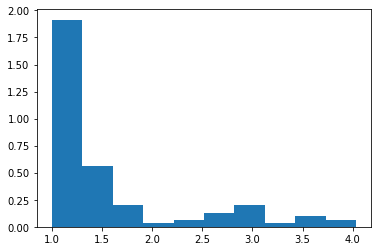

In [ ]:
plt.hist(sample, density=True)

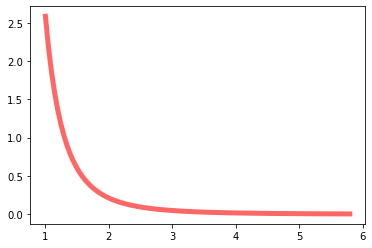

In [ ]:
# ваш код тут
fig, ax = plt.subplots(1, 1)
x = np.linspace(pareto.ppf(0.01, b), pareto.ppf(0.99, b), 100)

ax.plot(x, pareto.pdf(x, b),
       'r-', lw=5, alpha=0.6, label='pareto pdf')

In [ ]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.5859219777085767
0.5621998054204229


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

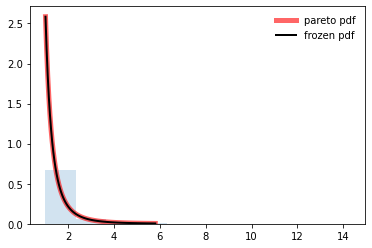

In [ ]:
fig, ax = plt.subplots(1, 1)
b = 2.62
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')
x = np.linspace(pareto.ppf(0.01, b),
                pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b),
       'r-', lw=5, alpha=0.6, label='pareto pdf')
rv = pareto(b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = pareto.ppf([0.001, 0.5, 0.999], b)
np.allclose([0.001, 0.5, 0.999], pareto.cdf(vals, b))
r = pareto.rvs(b, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


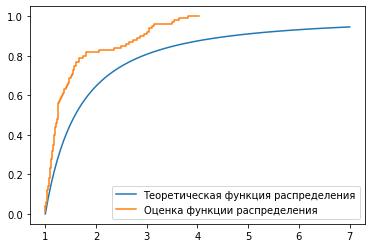

In [ ]:
# ваш код тут
b=1.5
x = np.linspace(1,7,100)
cdf = pareto.cdf(x,b)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки 
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')

plt.legend(['Теоретическая функция распределения', 'Оценка функции распределения'])

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:** считаю что не оч хорошо работаетдля распределения парето



## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [ ]:
from sklearn import model_selection, datasets, linear_model, tree, metrics, neighbors
from matplotlib import pyplot as plt

%pylab inline
import numpy as np
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample', 'var', 'pareto', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
df.groupby('churn').size()

churn
False    2850
True      483
dtype: int64

In [ ]:
s=df['total day calls']

s.mean()

100.43564356435644

In [ ]:
s.var()

402.7681409197326

In [ ]:
s.std()

20.069084207300854

In [ ]:
from statsmodels.stats.proportion import proportion_confint



In [ ]:
normal_interval = proportion_confint(df['churn'].sum(), 483, method = 'normal', alpha=0.05)
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [1.000000, 1.000000] with width 0.000000


In [ ]:
sts.t.interval(0.95, len(s)-1, loc=np.mean(s), scale=sts.sem(s))

(99.75406523041279, 101.11722189830009)

In [ ]:
df.groupby('total day calls').size()

total day calls
0      2
30     1
35     1
36     1
40     2
      ..
157    1
158    3
160    1
163    1
165    1
Length: 119, dtype: int64

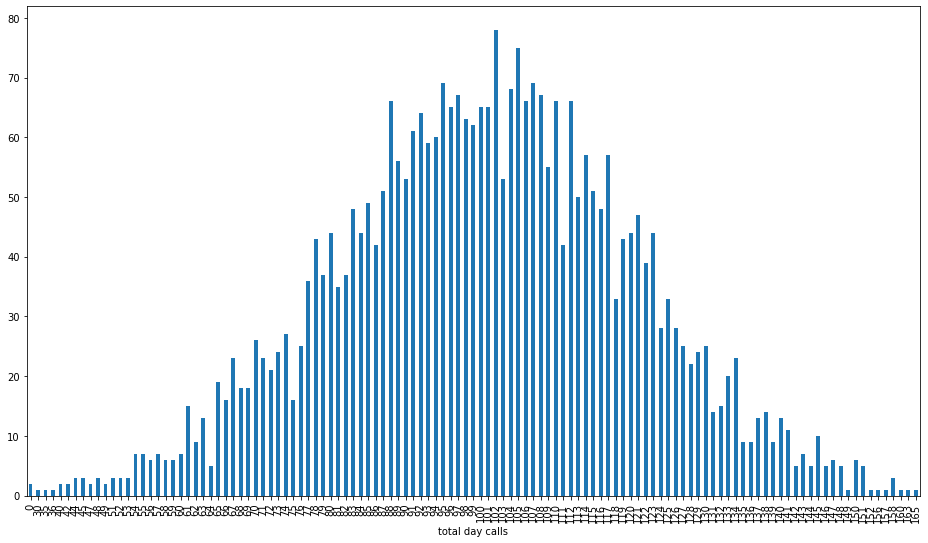

In [ ]:
df.groupby('total day calls').size().plot.bar(figsize=(16,9))

In [ ]:
subdf = df[['churn', 'total day calls']]
subdf = subdf.set_index('total day calls')

In [ ]:
import scipy

In [ ]:
subdf = df[['churn', 'total day calls']]
subdf = subdf.set_index('total day calls')

for calls in np.unique(subdf.index):
  print(f"total day calls {calls}:")
  calls_df = subdf.loc[calls]
  print(f".  size: {calls_df.shape[0]}") # ваш код тут
  print(f".  z interval: {_zconfint_generic(calls_df['churn'].mean(), np.std(calls_df['churn'], ddof=1), 0.05, 'two-sided')}") # ваш код тут
  print(f".  t interval: {_tconfint_generic(calls_df['churn'].mean(), np.std(calls_df['churn'], ddof=1), calls_df.shape[0]-1, 0.05, 'two-sided')}") # ваш код тут

total day calls 0:
.  size: 2
.  z interval: (-0.885903824349678, 1.885903824349678)
.  t interval: (-8.484643532275763, 9.484643532275763)
total day calls 30:
.  size: 1
.  z interval: (nan, nan)
.  t interval: (nan, nan)
total day calls 35:
.  size: 1
.  z interval: (nan, nan)
.  t interval: (nan, nan)
total day calls 36:
.  size: 1
.  z interval: (nan, nan)
.  t interval: (nan, nan)
total day calls 40:
.  size: 2
.  z interval: (0.0, 0.0)
.  t interval: (0.0, 0.0)
total day calls 42:
.  size: 2
.  z interval: (-0.885903824349678, 1.885903824349678)
.  t interval: (-8.484643532275763, 9.484643532275763)
total day calls 44:
.  size: 3
.  z interval: (-0.4649190674095053, 1.7982524007428387)
.  t interval: (-1.8174710451770864, 3.1508043785104194)
total day calls 45:
.  size: 3
.  z interval: (-0.7982524007428387, 1.4649190674095052)
.  t interval: (-2.1508043785104194, 2.8174710451770864)
total day calls 47:
.  size: 2
.  z interval: (-0.885903824349678, 1.885903824349678)
.  t interv

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



total day calls 123:
.  size: 44
.  z interval: (-0.582868927003076, 0.9465052906394398)
.  t interval: (-0.6050016452223448, 0.9686380088587085)
total day calls 124:
.  size: 28
.  z interval: (-0.6142628802893711, 1.1142628802893713)
.  t interval: (-0.6547722131766742, 1.1547722131766742)
total day calls 125:
.  size: 33
.  z interval: (-0.6105405980415631, 1.095389082890048)
.  t interval: (-0.6440372119945995, 1.1288856968430845)
total day calls 126:
.  size: 28
.  z interval: (-0.555572735291922, 0.8412870210062078)
.  t interval: (-0.5883092198472994, 0.8740235055615853)
total day calls 127:
.  size: 25
.  z interval: (-0.4626894534813469, 0.6226894534813469)
.  t interval: (-0.49146763475538685, 0.6514676347553868)
total day calls 128:
.  size: 22
.  z interval: (-0.5919187935947565, 0.9555551572311203)
.  t interval: (-0.6391530905820384, 1.002789454218402)
total day calls 129:
.  size: 24
.  z interval: (-0.6169427716211964, 1.1169427716211964)
.  t interval: (-0.66502077408

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of 